In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
from scripts.data_visualiser import *
from scripts.data_loader import *
from scripts.data_preprocessor import *
from scripts.temporal_data_preprocessor import *
from scripts.temporal_data_loader import *
from scripts.temporal_visualiser import *
from scripts.temporal_chanel_refinement import *
from Pipeline.pre_processing_pipeline import *
import numpy as np
import preprocessing_config as config

### Train Data

In [13]:
images = load_sentinel_images_temporal(config.sentinel_base_path)

(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)


In [ ]:
len(images)

19

In [ ]:
len(images[0])

In [ ]:
len(images[1])

In [ ]:
images[0][0].shape

In [ ]:
np.unique(images[0][0][:,:,-2])

In [ ]:
visualise_single_band(images[2][0],11)

In [ ]:
fields = extract_fields_temporal(images, config.field_size)

--- Processed 65 regions for scene 0
--- Processed 5 regions for scene 1
--- Processed 9 regions for scene 2
--- Processed 45 regions for scene 3
--- Processed 4 regions for scene 4
--- Processed 20 regions for scene 5
--- Processed 4 regions for scene 6
--- Processed 1 regions for scene 7
--- Processed 1 regions for scene 8
--- Processed 26 regions for scene 9
--- Processed 5 regions for scene 10
--- Processed 16 regions for scene 11
--- Processed 14 regions for scene 12
--- Processed 22 regions for scene 13
--- Processed 20 regions for scene 14
--- Processed 6 regions for scene 15
--- Processed 11 regions for scene 16
--- Processed 95 regions for scene 17
--- Processed 13 regions for scene 18


In [ ]:
len(fields)

382

In [ ]:
len(fields[0])

In [ ]:
#visualise_all_bands(fields[0][30])

In [ ]:
fields[1][10].shape

In [ ]:
np.unique(fields[0][10][:,:,-2])

#### Analysing Image Availability - 163 fields

In [ ]:
refined_fields = refine_temporal_stack_interval5(fields, config.temporal_stack_size, config.temporal_points)

Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag a

In [ ]:
len(refined_fields)

144

In [ ]:
len(refined_fields[0])

7

In [ ]:
refined_fields[0][0].shape

(64, 64, 13)

In [ ]:
np.unique(refined_fields[1][0][:,:,-2])

In [ ]:
fn_mask = load_single_image('/Users/bhumikasadbhave007/Documents/THWS/Semester-4/MASTER-THESIS/Temporal-Data/train/2019_data_rest/32UMV_6_3/field_number.pkl')
plt.imshow(fn_mask)

In [ ]:
np.unique(fn_mask)

In [ ]:
fn_mask = load_single_image('/Users/bhumikasadbhave007/Documents/THWS/Semester-4/MASTER-THESIS/Temporal-Data/test/SBR_2019_data/32UMU_8_2/field_number.pkl')
plt.imshow(fn_mask)

In [ ]:
np.unique(fn_mask)

### Train Data - with labels

In [3]:
images = load_sentinel_images_temporal('/Users/bhumikasadbhave007/Documents/THWS/Semester-4/MASTER-THESIS/Temporal-Data/test/first-10')

(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)


##### Rotation Error

In [ ]:
# sm = load_single_image('/Users/bhumikasadbhave007/Documents/THWS/Semester-4/MASTER-THESIS/Temporal-Data/test/first-11/32UMU_8_2/temporal_data/2019_06_26_all_bands_scl.pkl')
# sm.shape

In [ ]:
# mask = load_single_image('/Users/bhumikasadbhave007/Documents/THWS/Semester-4/MASTER-THESIS/Temporal-Data/test/first-11/32UMU_8_2/fieldmask.pkl')
# plt.imshow(mask)

In [ ]:
# sm1 = np.transpose(sm, (2, 1, 0))
# sm1.shape

In [ ]:
# sm1 = (sm1 - np.min(sm1)) / (np.max(sm1) - np.min(sm1))
# brightness_factor = 5  # >1 to increase brightness, <1 to decrease
# sm1 = np.clip(sm1 * brightness_factor, 0, 1)
# plt.figure(figsize=(8, 6))
# plt.imshow(sm1[:,:,:3])  # Use color map to visualize mCAI
# plt.axis('off')  # Hide axis
# plt.show()

In [ ]:
len(images)

In [ ]:
visualise_rgb(images[3][7])

In [ ]:
# ######## rotate-flip #########

# img2 = sm1#images[3][7]
# sm_fixed = np.flip(img2, axis=1)  # Flip along the vertical axis.
# sm_rotated = np.rot90(sm_fixed, k=1, axes=(0, 1))

# visualise_rgb(sm_rotated)

##### Continued

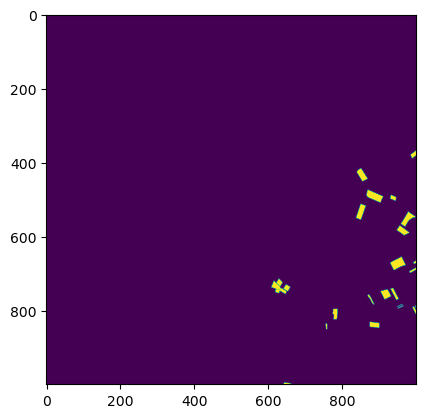

In [ ]:
plt.imshow(images[2][7][:,:,-1])

In [ ]:
np.unique(images[3][7][:,:,-2])

array([      0., 1182860., 1187473., 1224999., 1225816., 1225817.,
       1225820., 1225825.])

In [4]:
masked_images = mask_images_temporal(images)

In [5]:
fields = extract_fields_temporal(masked_images, config.field_size)

--- Processed 1 regions for scene 0
--- Processed 1 regions for scene 1
--- Processed 1 regions for scene 2
--- Processed 1 regions for scene 3
--- Processed 1 regions for scene 4


In [6]:
len(fields)

5

In [9]:
refined_fields = refine_temporal_stack_interval5(fields, config.temporal_stack_size, config.temporal_points)

In [10]:
len(refined_fields)

5

Saving Images

In [11]:
success = save_field_images_temporal(config.base_directory_temporal_test1, refined_fields)
success

True

In [12]:
temporal_images_train = load_field_images_temporal(config.base_directory_temporal_test1)
len(temporal_images_train)

48

In [13]:
folder_path = config.base_directory_temporal_test1
unique_ids = []
count = 0

for folder_name in os.listdir(folder_path):

    ids = folder_name.split("_")
    count += len(ids)

count

64

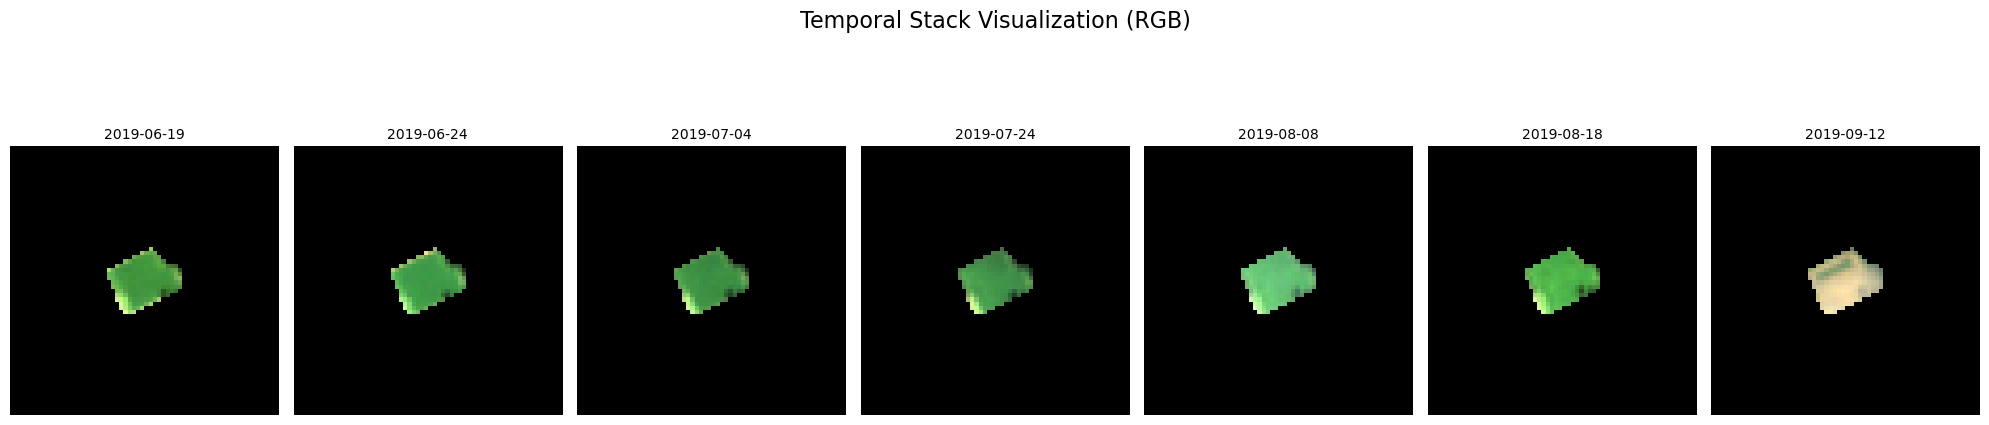

In [17]:
visualize_temporal_stack_rgb(temporal_images_train[1410])

In [ ]:
# temporal_images_train = load_field_images_temporal(config.base_directory_temporal_train)
# len(temporal_images_train)

In [ ]:
# visualize_temporal_stack_rgb(temporal_images_train[4])